In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
bankdata=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+'databases/00267/data_banknote_authentication.txt', sep= ',', header = None)

In [3]:
bankdata

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
bankdata.columns=['Variancle','Skewness','Curtosis','Entropy','Class']

In [6]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [9]:
svclassifier = SVC(kernel='linear', C=1)
scores = cross_val_score(svclassifier, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.02)


In [10]:
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [11]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[221   3]
 [  1 187]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       224
           1       0.98      0.99      0.99       188

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



<Figure size 640x480 with 0 Axes>

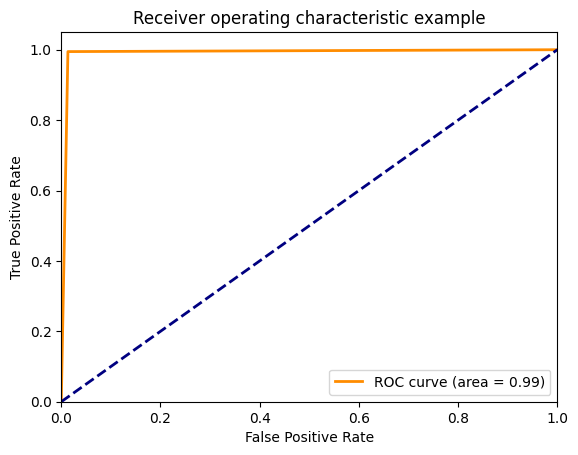

In [12]:
#ROC Curve & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [13]:
#SVM Polynomial Kernel.
svclassifier = SVC(kernel='poly',degree=3)
scores = cross_val_score(svclassifier, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.03)


In [14]:
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [15]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[212  12]
 [  0 188]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       224
           1       0.94      1.00      0.97       188

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



<Figure size 640x480 with 0 Axes>

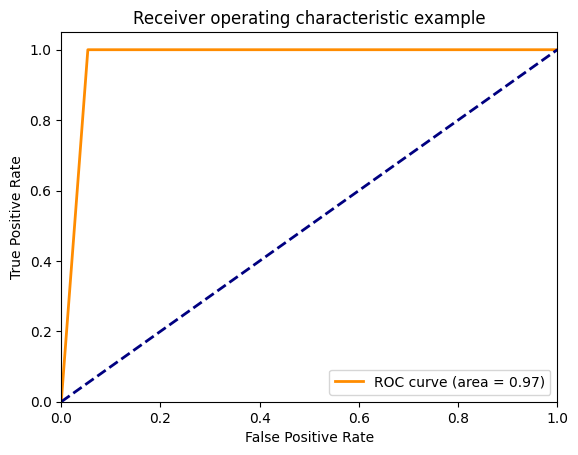

In [16]:
#ROC Curve & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
#SVM Gaussian Kernel.
svclassifier = SVC(kernel='rbf')
scores = cross_val_score(svclassifier, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.01)


In [19]:
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[224   0]
 [  0 188]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       188

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



<Figure size 640x480 with 0 Axes>

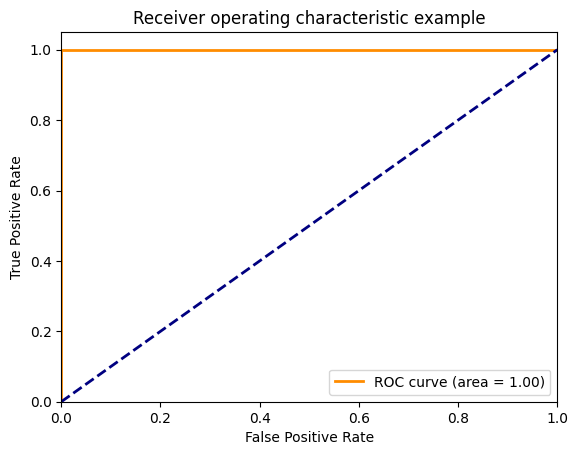

In [21]:
#ROC Curve & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()